# Classifyer for sexy AirBnB rentals

Firts we want to load the packages that we are going to use

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import random 
random.seed(a=666)

Now is time to have a look to the data, the data is downloaded from https://www.kaggle.com/airbnb/seattle

In [100]:
os.chdir(r'C:\Users\Carlosh\Downloads\Udacity\DataScience2Go\Blog post')
calendar = pd.read_csv(
    r'C:\Users\Carlosh\Downloads\Udacity\DataScience2Go\Blog post\calendar.csv')
calendar.head()
calendar.shape

(1393570, 4)

In [74]:
listings = pd.read_csv(
    r'C:\Users\Carlosh\Downloads\Udacity\DataScience2Go\Blog post\listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [75]:
reviews = pd.read_csv(
    r'C:\Users\Carlosh\Downloads\Udacity\DataScience2Go\Blog post\reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Q1: Now we want to have a look to the first question, we want to know wether the precier the apartments are, the better are the reviews.

In [76]:
#We have 92 feautures to look at
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [77]:
#Lets focus on review ratings
listings.review_scores_rating.head(3)
ratings = listings[['id', 'review_scores_rating']]
ratings.head()
ratings = ratings.rename(columns={"id": "listing_id"})

In [78]:
#Now lets create an adecuate dataframe that includes all the data that we want to use
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [79]:
#Firts lets get rid of those dollar symbols
def GetRidOfDollar(df, variable):
    df[variable] = df[variable].replace('[\$,]', '', regex=True).astype(float)
    return df
calendar = GetRidOfDollar(calendar, 'price')
mean_prices = calendar['price'].groupby(calendar['listing_id']).mean()
ids= np.array(mean_prices.index)
values= np.array(mean_prices.values)
matrix = np.column_stack((ids, values))
prices_mean=pd.DataFrame(data=matrix, columns=['listing_id', 'mean_price'])
prices_mean.head()

,listing_id,mean_price
0,3335.0,120.000000
1,4291.0,82.000000
2,5682.0,53.944984
3,6606.0,92.849315
4,7369.0,85.000000


In [80]:
#Listings_id should be an integrer, let's change that 
prices_mean['listing_id']= prices_mean['listing_id'].astype(int)
prices_mean.head()

,listing_id,mean_price
0,3335,120.000000
1,4291,82.000000
2,5682,53.944984
3,6606,92.849315
4,7369,85.000000


Now we need to join both datasets, and visualize the difference

,Rating,count,Average_price,Diff_av_price
0,20.000000,1.000000,95.614035,-40.150025
1,40.000000,4.000000,100.232955,-35.531106
2,53.000000,1.000000,257.857143,122.093083
3,55.000000,1.000000,249.000000,113.235940
4,57.000000,1.000000,35.636364,-100.127697
5,60.000000,12.000000,157.771472,22.007412
6,64.000000,1.000000,110.000000,-25.764060
7,65.000000,1.000000,45.747748,-90.016312
8,66.000000,2.000000,88.921918,-46.842142
9,67.000000,2.000000,122.500000,-13.264060


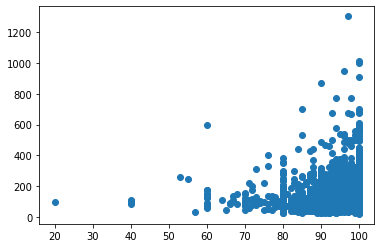

In [81]:
df1 = ratings.join(prices_mean.set_index('listing_id'), on='listing_id')
df1.head()
plt.scatter(df1['review_scores_rating'], df1['mean_price'])
OverallMeanPrice = df1.mean_price.mean()
groupedByRating = df1['mean_price'].groupby(df1['review_scores_rating']).describe()
review_scores_rating = np.array(groupedByRating.index)
values2 = np.array(groupedByRating.values)
matrix2 = np.column_stack((review_scores_rating, values2))
prices_byRating = pd.DataFrame(data=matrix2) 
prices_byRating = prices_byRating.iloc[:, 0:3]
prices_byRating= prices_byRating.rename(columns={0: "Rating", 1: "count", 2:"Average_price"})
prices_byRating['Diff_av_price'] = prices_byRating['Average_price']-OverallMeanPrice
prices_byRating.style.bar(subset=['Diff_av_price'], align='mid', color=['#d65f5f', '#5fba7d'])

Q2: Do top rated listings use different word on their descriptions from the rest of listings? 

In [82]:
descriptions = listings[[ 'id', 'description']]
descriptions = descriptions.rename(columns={"id": "listing_id"})
#lets create a dataframe with all the relevant information
df2 = df1.join(descriptions.set_index('listing_id'), on='listing_id')

Now for each class or subset of listings, we want to get all the words used and after that select the most common ones. Let's do it!!

C:\Users\Carlosh\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<BarContainer object of 7 artists>

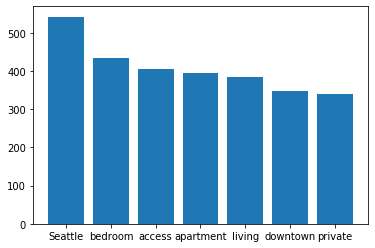

In [83]:
#Function that retrieves list of words used

def GetWordsUsed(description):
    words = description.split()
    longWords = [s for s in words if len(s) > 4]
    
        
    return longWords
def GetMostUsed(words):
    counter = collections.Counter(words)
    commons= counter.most_common(10)
    return commons
    
  
df2['list_of_words'] = df2.apply(lambda x: GetWordsUsed(x['description']),axis=1)
#Now subset only for the sexy ones
sexy_apartments= df2[df2['review_scores_rating']==100]
sexy_apartments['most_common_words'] = sexy_apartments.apply(
    lambda x: GetMostUsed(x['list_of_words']),axis=1)
sexy_series= sexy_apartments.list_of_words.values
def ConvertToString(series):
    all_words = []
    for i in range(len(series)):
        for word in series[i]:
            all_words.append(word)
    
    return all_words
        
sexy_words= ConvertToString(sexy_series)
cnt= collections.Counter()
for word in sexy_words:
    cnt[word] += 1
mostCommonSexy= list(zip(*cnt.most_common(7)))
mostCommonSexyframe= pd.DataFrame(data=[mostCommonSexy[1],mostCommonSexy[0]],).T
mostCommonSexyframe = mostCommonSexyframe.rename(columns={0: "count", 
                                                              1: "word"})
plt.bar(mostCommonSexy[0],mostCommonSexy[1])

Now is time to do the same but for the unsexy aparments! 

C:\Users\Carlosh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 7 artists>

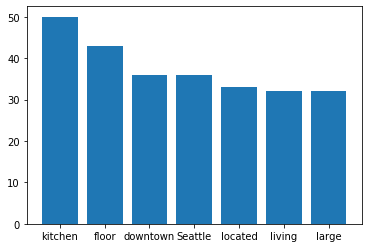

In [84]:
unsexy_apartments = df2[df2['review_scores_rating']<80]
unsexy_apartments['most_common_words'] = sexy_apartments.apply(
    lambda x: GetMostUsed(x['list_of_words']),axis=1)
unsexy_series= unsexy_apartments.list_of_words.values
unsexy_words= ConvertToString(unsexy_series)
cnt2= collections.Counter()
for word in unsexy_words:
    cnt2[word] += 1
mostCommonUnSexy= list(zip(*cnt2.most_common(7)))
mostCommonUnSexyframe= pd.DataFrame(data=[mostCommonUnSexy[1],mostCommonUnSexy[0]],).T
mostCommonUnSexyframe = mostCommonUnSexyframe.rename(columns={0: "count", 
                                                              1: "word"})
plt.bar(mostCommonUnSexy[0],mostCommonUnSexy[1])

In [85]:
#Visualize the difference for a larger set of words
mostCommonSexyLarge= list(zip(*cnt.most_common(50)))
mostCommonUnSexyLarge= list(zip(*cnt2.most_common(50)))
mostCommonSexyframe= pd.DataFrame(data=[mostCommonSexyLarge[1],mostCommonSexyLarge[0]],).T
mostCommonSexyframe = mostCommonSexyframe.rename(columns={0: "count", 
                                                              1: "word"})
mostCommonUnSexyframe= pd.DataFrame(data=[mostCommonUnSexyLarge[1],mostCommonUnSexyLarge[0]],).T
mostCommonUnSexyframe = mostCommonUnSexyframe.rename(columns={0: "count", 
                                                              1: "word"})

df3 = mostCommonSexyframe.join(mostCommonUnSexyframe.set_index('word'), on='word',
                               lsuffix='_left', rsuffix='_right')
df3['proportion_unsexy']= df3['count_left']/len(unsexy_words)
df3['proportion_sexy']= df3['count_right']/len(sexy_words)
df3['difference_proportion']= df3['proportion_unsexy']-df3['proportion_sexy']
df3_noNA = df3.dropna(axis=0)
df3_noNA.style.bar(subset=['difference_proportion'], align='mid', color=['#d65f5f', '#5fba7d'])

,count_left,word,count_right,proportion_unsexy,proportion_sexy,difference_proportion
0,542,Seattle,36,0.114831,0.000676,0.114154
1,434,bedroom,29,0.091949,0.000545,0.091405
2,406,access,24,0.086017,0.000451,0.085566
3,395,apartment,27,0.083686,0.000507,0.083179
4,384,living,32,0.081356,0.000601,0.080755
5,348,downtown,36,0.073729,0.000676,0.073053
6,339,private,26,0.071822,0.000488,0.071334
7,320,house,24,0.067797,0.000451,0.067346
8,317,space,25,0.067161,0.000470,0.066691
9,315,kitchen,50,0.066737,0.000939,0.065798


Now let's have a look at the words that only are common in the unsexy listings

In [86]:
df3_NA=df3[df3['count_right'].isnull()]
df3_NA['word']

20        Seattle.
22        kitchen,
23         minutes
25    restaurants,
27         walking
29           Queen
36       Seattle's
37        distance
38     comfortable
39           enjoy
41          within
43           room,
44           which
45          modern
46           block
47           small
49          shared
Name: word, dtype: object

Q3: Lets try to fit a predictive model to our data


In [87]:
#Firts lets have a look to the features that might be interesting
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [90]:
#We have a boolean variable over here that looks interesting
listings.host_is_superhost.describe


<bound method NDFrame.describe of 0       f
1       t
2       f
3       f
4       f
       ..
3813    f
3814    f
3815    f
3816    f
3817    f
Name: host_is_superhost, Length: 3818, dtype: object>

In [91]:
#Numeric data that could be interesting
listings.host_response_rate.describe()

count     3295
unique      45
top       100%
freq      2371
Name: host_response_rate, dtype: object

In [92]:
#Categorical data, also looks interesting
listings.neighbourhood_group_cleansed.describe()

count                    3818
unique                     17
top       Other neighborhoods
freq                      794
Name: neighbourhood_group_cleansed, dtype: object

In [94]:
#Ok, for a first try we have enough features, lets build the dataframe now
listings = listings.rename(columns={"id": "listing_id"})
df4= listings[['listing_id', 'host_is_superhost', 'neighbourhood_cleansed',
              'host_response_rate', 'bathrooms', 'extra_people']]
df4= df1.join(df4.set_index('listing_id'), on='listing_id')
#First we need to drop rows containing NAs
df4= df4.dropna( axis=0)
#Lets get rid of the dollar symbols again
df4= GetRidOfDollar(df4, 'extra_people')
#we need to get rid of those percentage symbols as well
def GetRidOfPercentage(df, variable):
    df[variable] = df[variable].replace('[\%,]', '', regex=True).astype(float)
    return df
df4= GetRidOfPercentage(df4, 'host_response_rate')
#Now we want to convert our categorical var to dummies
def CatToDummy(df):
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X 
df4_dummy= CatToDummy(df4)
df4_dummy

,listing_id,review_scores_rating,mean_price,host_response_rate,bathrooms,extra_people,host_is_superhost_t,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,...,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace
0,241032,95.0,85.000000,96.0,1.0,5.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,953595,96.0,170.931271,98.0,1.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3308979,97.0,1301.818182,67.0,4.5,25.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,278830,92.0,462.739726,100.0,2.0,15.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1909058,99.0,80.000000,100.0,1.0,10.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,262764,92.0,191.651982,100.0,1.0,50.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3811,8578490,100.0,67.782805,100.0,1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3812,3383329,96.0,102.818815,100.0,1.0,8.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3813,8101950,80.0,359.000000,99.0,2.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now is time for build a classification model

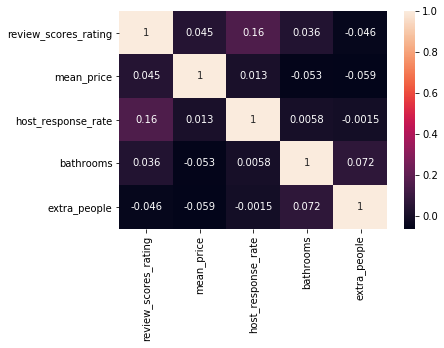

In [59]:

corr_matrix= df4.drop(['listing_id'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [95]:
X = df4_dummy.iloc[:, 2:93]
X

,mean_price,host_response_rate,bathrooms,extra_people,host_is_superhost_t,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,...,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace
0,85.000000,96.0,1.0,5.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,170.931271,98.0,1.0,0.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1301.818182,67.0,4.5,25.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,462.739726,100.0,2.0,15.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,80.000000,100.0,1.0,10.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,191.651982,100.0,1.0,50.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3811,67.782805,100.0,1.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3812,102.818815,100.0,1.0,8.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3813,359.000000,99.0,2.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:

#we need to convert our dependent variable to binary
def ConvertToBinary(array, treshold):
    binary = np.zeros(len(array))
    for observation in range(len(array)):
        if array[observation] == treshold:
            binary[observation]= 1
        else:
            binary[observation]=0
    return binary
        
        
y = ConvertToBinary(df4_dummy[['review_scores_rating']].to_numpy(), 100)
y

array([0., 0., 0., ..., 0., 0., 1.])

Text(0.5, 257.44, 'Predicted label')

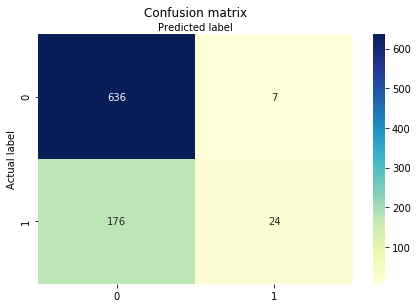

In [97]:
#Split intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
log_model= LogisticRegression(max_iter= 1000)
#fit the model
log_model.fit(X_test, y_test)
y_pred=log_model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [98]:
#Evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7829181494661922
Precision: 0.7741935483870968
Recall: 0.12


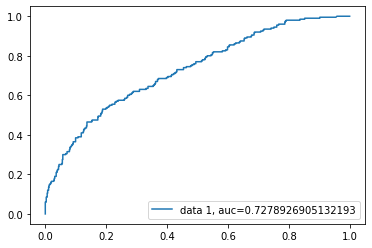

In [99]:
y_pred_proba = log_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()